In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [41]:
from sqlite3 import connect

conn = connect("E:\git\py-restaurant-data-analysis\db.sqlite3")

data = pd.read_sql_query('''
    SELECT order_id, product_id, name, quantity, price, datetime FROM restaurant_orderitem
    INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
    INNER JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
''', conn)
df = pd.DataFrame(data)
df.index += 1
df

,order_id,product_id,name,quantity,price,datetime
1,1,6,Plain Papadum,2,0.80,2019-08-03 20:25:00
2,1,240,King Prawn Balti,1,12.95,2019-08-03 20:25:00
3,1,19,Garlic Naan,1,2.95,2019-08-03 20:25:00
4,1,36,Mushroom Rice,1,3.95,2019-08-03 20:25:00
5,1,111,Paneer Tikka Masala,1,8.95,2019-08-03 20:25:00
...,...,...,...,...,...,...
74814,3255,247,House Red wine 75cl,2,17.95,2016-05-18 18:53:00
74815,12905,247,House Red wine 75cl,2,17.95,2016-05-14 19:28:00
74816,3272,247,House Red wine 75cl,2,17.95,2016-05-10 13:18:00
74817,11404,248,House white wine 75cl,1,17.95,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: ylabel='quantity'>

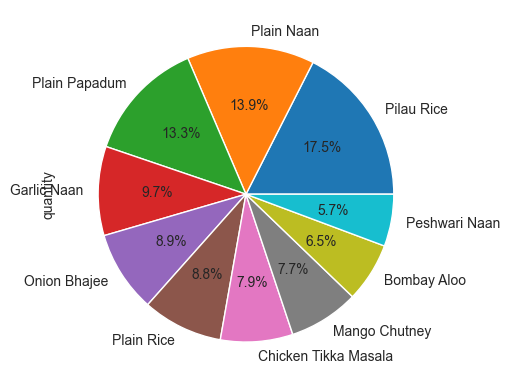

In [42]:
df.groupby(df["name"]).count()["quantity"].sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%")


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: ylabel='item_price'>

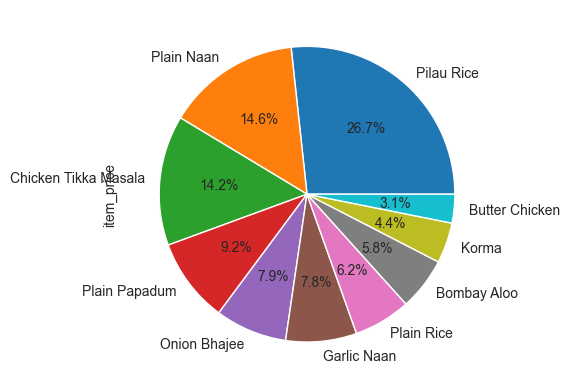

In [50]:
df_item_price = df.groupby(df["name"]).sum()[["quantity", "price"]]
df_item_price["item_price"] = df_item_price["quantity"] * df_item_price["price"]
df_item_price["item_price"].sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: xlabel='order_hour'>

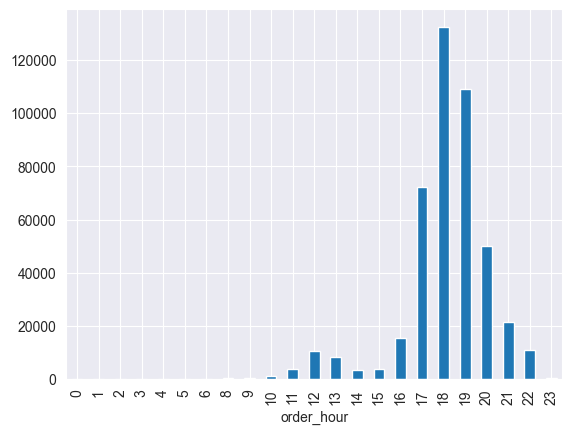

In [53]:
df["datetime"] = pd.to_datetime(df.datetime)
df["order_hour"] = df["datetime"].dt.hour
df["item_price"] = df["quantity"] * df["price"]
df.groupby(df["order_hour"])["item_price"].sum().plot.bar()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='day_of_week'>

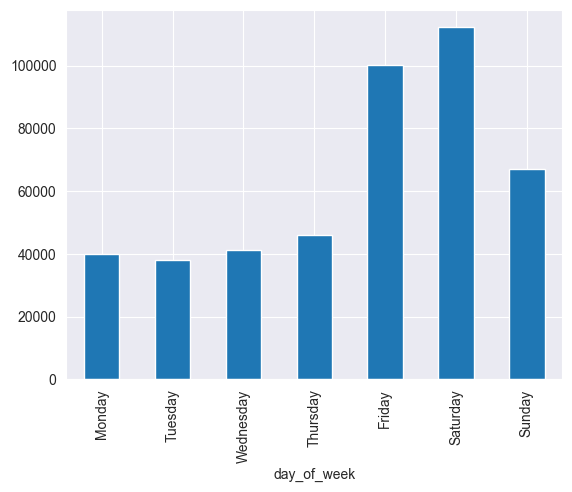

In [59]:
df["day_of_week"] = df["datetime"].dt.day_name()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=days_order, ordered=True)

df.groupby(df["day_of_week"])["item_price"].sum().plot.bar()